# ①集成学习 AdaBoostClassifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,cross_validation,ensemble

E:\Data_analysis_plan\python_36_install\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 加载用于分类问题的数据

In [2]:
def load_data_classification():
    '''
    加载用于分类问题的数据集

    :return: 一个元组，用于分类问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的标记、测试样本集对应的标记
    '''
    digits=datasets.load_digits() # 使用 scikit-learn 自带的 digits 数据集
    return cross_validation.train_test_split(digits.data,digits.target,
    test_size=0.25,random_state=0,stratify=digits.target) # 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

# 测试 AdaBoostClassifier 的用法，绘制 AdaBoostClassifier 的预测性能随基础分类器数量的影响(含画布大小调整方法)

In [107]:
def test_AdaBoostClassifier(*data):
    '''
    测试 AdaBoostClassifier 的用法，绘制 AdaBoostClassifier 的预测性能随基础分类器数量的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train,y_train)
    ## 绘图
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    ax=fig.add_subplot(1,1,1)
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="Traing score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostClassifier")
    plt.show()

# 测试  AdaBoostClassifier 的预测性能随基础分类器数量和基础分类器的类型的影响

In [5]:
def test_AdaBoostClassifier_base_classifier(*data):
    '''
    测试  AdaBoostClassifier 的预测性能随基础分类器数量和基础分类器的类型的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    from sklearn.naive_bayes import GaussianNB
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(2,1,1)
    ########### 默认的个体分类器 #############
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train,y_train)
    ## 绘图
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="Traing score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Decision Tree")
    ####### Gaussian Naive Bayes 个体分类器 ########
    ax=fig.add_subplot(2,1,2)
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1,base_estimator=GaussianNB())
    clf.fit(X_train,y_train)
    ## 绘图
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(clf.staged_score(X_train,y_train)),label="Traing score")
    ax.plot(list(X),list(clf.staged_score(X_test,y_test)),label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Gaussian Naive Bayes")
    plt.show()

# 测试  AdaBoostClassifier 的预测性能随学习率的影响

In [6]:
def test_AdaBoostClassifier_learning_rate(*data):
    '''
    测试  AdaBoostClassifier 的预测性能随学习率的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    learning_rates=np.linspace(0.01,1)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    traing_scores=[]
    testing_scores=[]
    for learning_rate in learning_rates:
        clf=ensemble.AdaBoostClassifier(learning_rate=learning_rate,n_estimators=500)
        clf.fit(X_train,y_train)
        traing_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(learning_rates,traing_scores,label="Traing score")
    ax.plot(learning_rates,testing_scores,label="Testing score")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostClassifier")
    plt.show()

# 测试  AdaBoostClassifier 的预测性能随学习率和 algorithm 参数的影响

In [91]:
def test_AdaBoostClassifier_algorithm(*data):
    '''
    测试  AdaBoostClassifier 的预测性能随学习率和 algorithm 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    algorithms=['SAMME.R','SAMME']
    fig=plt.figure()
    learning_rates=[0.05,0.1,0.5,0.9]
    for i,learning_rate in enumerate(learning_rates):
        ax=fig.add_subplot(2,2,i+1)
        for i ,algorithm in enumerate(algorithms):
            clf=ensemble.AdaBoostClassifier(learning_rate=learning_rate,
				algorithm=algorithm)
            clf.fit(X_train,y_train)
            ## 绘图
            estimators_num=len(clf.estimators_)
            X=range(1,estimators_num+1)
            ax.plot(list(X),list(clf.staged_score(X_train,y_train)),
				label="%s:Traing score"%algorithms[i])
            ax.plot(list(X),list(clf.staged_score(X_test,y_test)),
				label="%s:Testing score"%algorithms[i])
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_title("learing rate:%f"%learning_rate)
    fig.suptitle("AdaBoostClassifier")
    plt.show()

#  获取分类数据

In [3]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data_classification() 

# 调用 test_AdaBoostClassifier

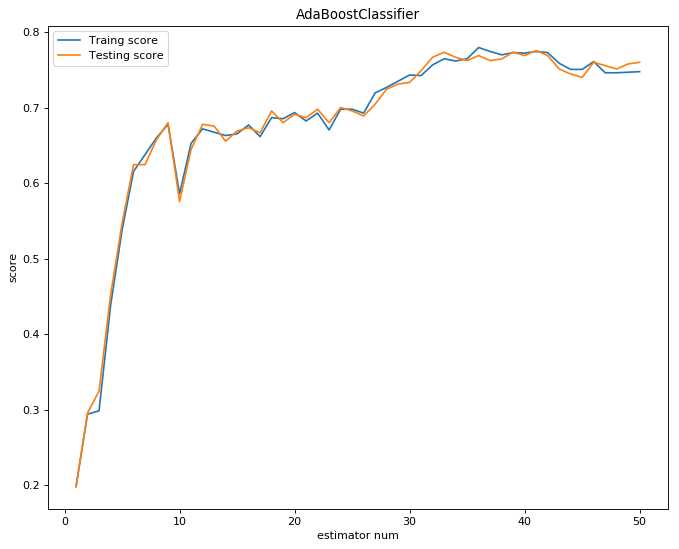

In [108]:
test_AdaBoostClassifier(X_train,X_test,y_train,y_test) 

# 调用 test_AdaBoostClassifier_base_classifier

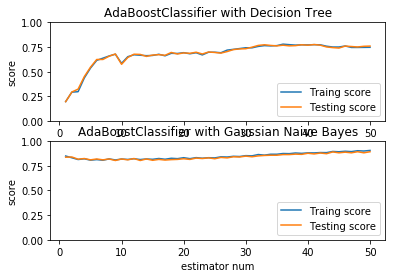

In [88]:
test_AdaBoostClassifier_base_classifier(X_train,X_test,y_train,y_test) 

# 调用 test_AdaBoostClassifier_learning_rate

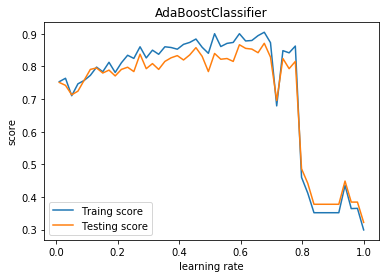

In [89]:
test_AdaBoostClassifier_learning_rate(X_train,X_test,y_train,y_test) 

# 调用 test_AdaBoostClassifier_algorithm

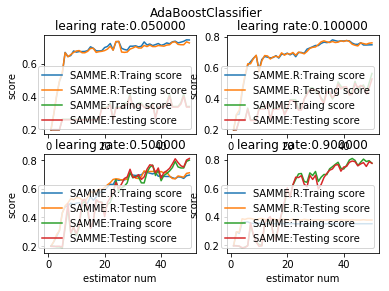

In [90]:
test_AdaBoostClassifier_algorithm(X_train,X_test,y_train,y_test) 

# ②集成学习AdaBoostRegressor

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,cross_validation,ensemble

# 加载用于回归问题的数据集

In [16]:
def load_data_regression():
    '''
    加载用于回归问题的数据集

    :return: 一个元组，用于回归问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的值、测试样本集对应的值
    '''
    diabetes = datasets.load_diabetes() #使用 scikit-learn 自带的一个糖尿病病人的数据集
    return cross_validation.train_test_split(diabetes.data,diabetes.target,
    test_size=0.25,random_state=0) # 拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

# 测试 AdaBoostRegressor 的用法，绘制 AdaBoostRegressor 的预测性能随基础回归器数量的影响

In [17]:
def test_AdaBoostRegressor(*data):
    '''
    测试 AdaBoostRegressor 的用法，绘制 AdaBoostRegressor 的预测性能随基础回归器数量的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    regr=ensemble.AdaBoostRegressor()
    regr.fit(X_train,y_train)
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    estimators_num=len(regr.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X),list(regr.staged_score(X_train,y_train)),label="Traing score")
    ax.plot(list(X),list(regr.staged_score(X_test,y_test)),label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostRegressor")
    plt.show()

# 测试 AdaBoostRegressor 的预测性能随基础回归器数量的和基础回归器类型的影响

In [18]:
def test_AdaBoostRegressor_base_regr(*data):
    '''
    测试 AdaBoostRegressor 的预测性能随基础回归器数量的和基础回归器类型的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    from sklearn.svm import  LinearSVR
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    regrs=[ensemble.AdaBoostRegressor(), # 基础回归器为默认类型
		ensemble.AdaBoostRegressor(base_estimator=LinearSVR(epsilon=0.01,C=100))] # 基础回归器为 LinearSVR
    labels=["Decision Tree Regressor","Linear SVM Regressor"]
    for i ,regr in enumerate(regrs):
        ax=fig.add_subplot(2,1,i+1)
        regr.fit(X_train,y_train)
        ## 绘图
        estimators_num=len(regr.estimators_)
        X=range(1,estimators_num+1)
        ax.plot(list(X),list(regr.staged_score(X_train,y_train)),label="Traing score")
        ax.plot(list(X),list(regr.staged_score(X_test,y_test)),label="Testing score")
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_ylim(-1,1)
        ax.set_title("Base_Estimator:%s"%labels[i])
    plt.suptitle("AdaBoostRegressor")
    plt.show()

# 测试 AdaBoostRegressor 的预测性能随学习率的影响

In [19]:
def test_AdaBoostRegressor_learning_rate(*data):
    '''
    测试 AdaBoostRegressor 的预测性能随学习率的影响

    :param data:   可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    learning_rates=np.linspace(0.01,1)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    traing_scores=[]
    testing_scores=[]
    for learning_rate in learning_rates:
        regr=ensemble.AdaBoostRegressor(learning_rate=learning_rate,n_estimators=500)
        regr.fit(X_train,y_train)
        traing_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(learning_rates,traing_scores,label="Traing score")
    ax.plot(learning_rates,testing_scores,label="Testing score")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostRegressor")
    plt.show()

# 测试 AdaBoostRegressor 的预测性能随损失函数类型的影响

In [20]:
def test_AdaBoostRegressor_loss(*data):
    '''
    测试 AdaBoostRegressor 的预测性能随损失函数类型的影响

    :param data:    可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    losses=['linear','square','exponential']
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    for i ,loss in enumerate(losses):
        regr=ensemble.AdaBoostRegressor(loss=loss,n_estimators=30)
        regr.fit(X_train,y_train)
        ## 绘图
        estimators_num=len(regr.estimators_)
        X=range(1,estimators_num+1)
        ax.plot(list(X),list(regr.staged_score(X_train,y_train)),
			label="Traing score:loss=%s"%loss)
        ax.plot(list(X),list(regr.staged_score(X_test,y_test)),
			label="Testing score:loss=%s"%loss)
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_ylim(-1,1)
    plt.suptitle("AdaBoostRegressor")
    plt.show()

# 获取回归数据

In [21]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data_regression()

# 调用 test_AdaBoostRegressor

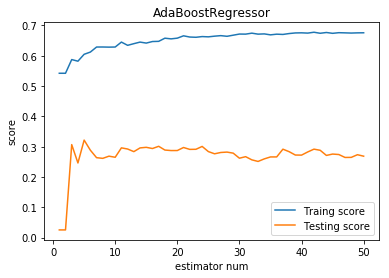

In [22]:
test_AdaBoostRegressor(X_train,X_test,y_train,y_test)

# 调用 test_AdaBoostRegressor_base_regr

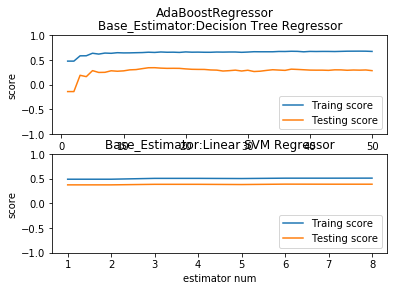

In [23]:
test_AdaBoostRegressor_base_regr(X_train,X_test,y_train,y_test)

# 调用 test_AdaBoostRegressor_learning_rate

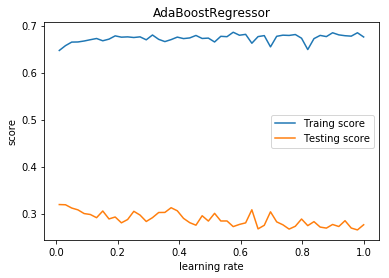

In [24]:
test_AdaBoostRegressor_learning_rate(X_train,X_test,y_train,y_test)

# 调用 test_AdaBoostRegressor_loss

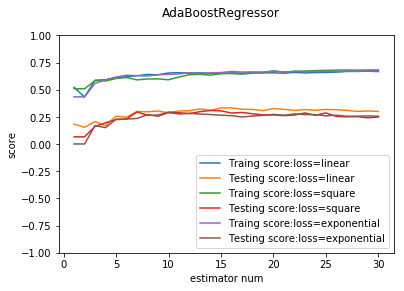

In [25]:
test_AdaBoostRegressor_loss(X_train,X_test,y_train,y_test)

# ③集成学习 GradientBoostingClassifier

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,cross_validation,ensemble

# 加载用于分类问题的数据集

In [27]:
def load_data_classification():
    '''
    加载用于分类问题的数据集

    :return: 一个元组，用于分类问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的标记、测试样本集对应的标记
    '''
    digits=datasets.load_digits() # 使用 scikit-learn 自带的 digits 数据集
    return cross_validation.train_test_split(digits.data,digits.target,
    test_size=0.25,random_state=0,stratify=digits.target) # 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

# 测试 GradientBoostingClassifier 的用法

In [28]:
def test_GradientBoostingClassifier(*data):
    '''
    测试 GradientBoostingClassifier 的用法

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    clf=ensemble.GradientBoostingClassifier()
    clf.fit(X_train,y_train)
    print("Traing Score:%f"%clf.score(X_train,y_train))
    print("Testing Score:%f"%clf.score(X_test,y_test))

# 测试 GradientBoostingClassifier 的预测性能随 n_estimators 参数的影响

In [29]:
def test_GradientBoostingClassifier_num(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 n_estimators 参数的影响

    :param data:   可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,100,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        clf=ensemble.GradientBoostingClassifier(n_estimators=num)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()

# 测试 GradientBoostingClassifier 的预测性能随 max_depth 参数的影响

In [30]:
def test_GradientBoostingClassifier_maxdepth(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 max_depth 参数的影响

    :param data:    可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    maxdepths=np.arange(1,20)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for maxdepth in maxdepths:
        clf=ensemble.GradientBoostingClassifier(max_depth=maxdepth,max_leaf_nodes=None)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(maxdepths,training_scores,label="Training Score")
    ax.plot(maxdepths,testing_scores,label="Testing Score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()

# 测试 GradientBoostingClassifier 的预测性能随学习率参数的影响

In [31]:
def test_GradientBoostingClassifier_learning(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随学习率参数的影响

    :param data:    可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    learnings=np.linspace(0.01,1.0)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for learning in learnings:
        clf=ensemble.GradientBoostingClassifier(learning_rate=learning)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(learnings,training_scores,label="Training Score")
    ax.plot(learnings,testing_scores,label="Testing Score")
    ax.set_xlabel("learning_rate")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()

# 测试 GradientBoostingClassifier 的预测性能随 subsample 参数的影响

In [32]:
def test_GradientBoostingClassifier_subsample(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 subsample 参数的影响

    :param data:    可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    subsamples=np.linspace(0.01,1.0)
    testing_scores=[]
    training_scores=[]
    for subsample in subsamples:
            clf=ensemble.GradientBoostingClassifier(subsample=subsample)
            clf.fit(X_train,y_train)
            training_scores.append(clf.score(X_train,y_train))
            testing_scores.append(clf.score(X_test,y_test))
    ax.plot(subsamples,training_scores,label="Training Score")
    ax.plot(subsamples,testing_scores,label="Training Score")
    ax.set_xlabel("subsample")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()

# 测试 GradientBoostingClassifier 的预测性能随 max_features 参数的影响

In [33]:
def test_GradientBoostingClassifier_max_features(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 max_features 参数的影响

    :param data:    可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:   None
    '''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    max_features=np.linspace(0.01,1.0)
    testing_scores=[]
    training_scores=[]
    for features in max_features:
            clf=ensemble.GradientBoostingClassifier(max_features=features)
            clf.fit(X_train,y_train)
            training_scores.append(clf.score(X_train,y_train))
            testing_scores.append(clf.score(X_test,y_test))
    ax.plot(max_features,training_scores,label="Training Score")
    ax.plot(max_features,testing_scores,label="Training Score")
    ax.set_xlabel("max_features")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()

# 获取分类数据

In [35]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data_classification() 

# 调用 test_GradientBoostingClassifier

In [36]:
test_GradientBoostingClassifier(X_train,X_test,y_train,y_test) 

Traing Score:1.000000
Testing Score:0.960000


# 调用 test_GradientBoostingClassifier_num

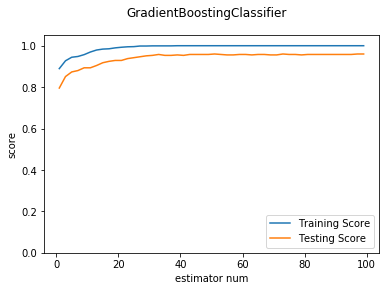

In [37]:
test_GradientBoostingClassifier_num(X_train,X_test,y_train,y_test) 

# 调用 test_GradientBoostingClassifier_maxdepth

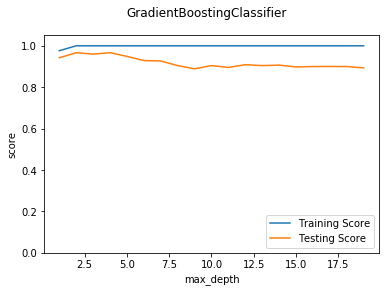

In [38]:
test_GradientBoostingClassifier_maxdepth(X_train,X_test,y_train,y_test) 

# 调用 test_GradientBoostingClassifier_learning

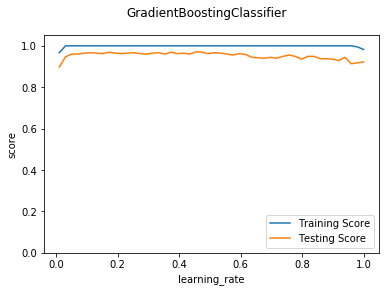

In [39]:
test_GradientBoostingClassifier_learning(X_train,X_test,y_train,y_test) 

# 调用 test_GradientBoostingClassifier_subsample

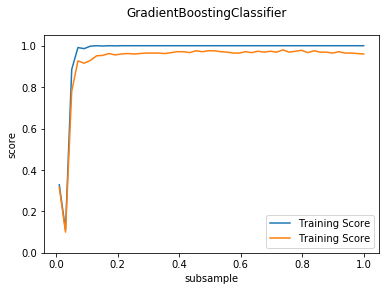

In [40]:
test_GradientBoostingClassifier_subsample(X_train,X_test,y_train,y_test) 

# 调用 test_GradientBoostingClassifier_max_features

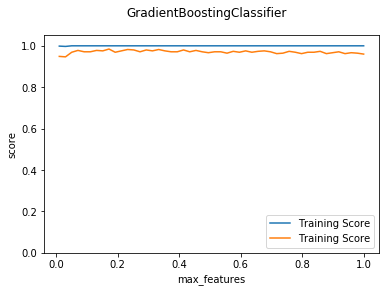

In [42]:
test_GradientBoostingClassifier_max_features(X_train,X_test,y_train,y_test) 

# ④集成学习GradientBoostingRegressor

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,cross_validation,ensemble

# 加载用于回归问题的数据集

In [44]:
def load_data_regression():
    '''
    加载用于回归问题的数据集

    :return: 一个元组，用于回归问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的值、测试样本集对应的值
    '''
    diabetes = datasets.load_diabetes() #使用 scikit-learn 自带的一个糖尿病病人的数据集
    return cross_validation.train_test_split(diabetes.data,diabetes.target,
    test_size=0.25,random_state=0) # 拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

# 测试 GradientBoostingRegressor 的用法

In [45]:
def test_GradientBoostingRegressor(*data):
    '''
    测试 GradientBoostingRegressor 的用法

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return:   None
    '''
    X_train,X_test,y_train,y_test=data
    regr=ensemble.GradientBoostingRegressor()
    regr.fit(X_train,y_train)
    print("Training score:%f"%regr.score(X_train,y_train))
    print("Testing score:%f"%regr.score(X_test,y_test))

# 测试 GradientBoostingRegressor 的预测性能随 n_estimators 参数的影响

In [46]:
def test_GradientBoostingRegressor_num(*data):
    '''
    测试 GradientBoostingRegressor 的预测性能随 n_estimators 参数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return:   None
    '''
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,200,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        regr=ensemble.GradientBoostingRegressor(n_estimators=num)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()

# 测试 GradientBoostingRegressor 的预测性能随 max_depth 参数的影响

In [47]:
def test_GradientBoostingRegressor_maxdepth(*data):
    '''
    测试 GradientBoostingRegressor 的预测性能随 max_depth 参数的影响

    :param data:   可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    maxdepths=np.arange(1,20)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for maxdepth in maxdepths:
        regr=ensemble.GradientBoostingRegressor(max_depth=maxdepth,max_leaf_nodes=None)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(maxdepths,training_scores,label="Training Score")
    ax.plot(maxdepths,testing_scores,label="Testing Score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1.05)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()

# 测试 GradientBoostingRegressor 的预测性能随 learning_rate 参数的影响

In [48]:
def test_GradientBoostingRegressor_learning(*data):
    '''
    测试 GradientBoostingRegressor 的预测性能随 learning_rate 参数的影响

    :param data:   可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    learnings=np.linspace(0.01,1.0)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for learning in learnings:
        regr=ensemble.GradientBoostingRegressor(learning_rate=learning)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(learnings,training_scores,label="Training Score")
    ax.plot(learnings,testing_scores,label="Testing Score")
    ax.set_xlabel("learning_rate")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1.05)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()

# 测试 GradientBoostingRegressor 的预测性能随 subsample 参数的影响

In [49]:
def test_GradientBoostingRegressor_subsample(*data):
    '''
    测试 GradientBoostingRegressor 的预测性能随 subsample 参数的影响

    :param data:    可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    subsamples=np.linspace(0.01,1.0,num=20)
    testing_scores=[]
    training_scores=[]
    for subsample in subsamples:
            regr=ensemble.GradientBoostingRegressor(subsample=subsample)
            regr.fit(X_train,y_train)
            training_scores.append(regr.score(X_train,y_train))
            testing_scores.append(regr.score(X_test,y_test))
    ax.plot(subsamples,training_scores,label="Training Score")
    ax.plot(subsamples,testing_scores,label="Training Score")
    ax.set_xlabel("subsample")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1.05)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()

# 测试 GradientBoostingRegressor 的预测性能随不同的损失函数和 alpha 参数的影响

In [50]:
def test_GradientBoostingRegressor_loss(*data):
    '''
    测试 GradientBoostingRegressor 的预测性能随不同的损失函数和 alpha 参数的影响

    :param data:   可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    nums=np.arange(1,200,step=2)
    ########## 绘制 huber ######
    ax=fig.add_subplot(2,1,1)
    alphas=np.linspace(0.01,1.0,endpoint=False,num=5)
    for alpha in alphas:
            testing_scores=[]
            training_scores=[]
            for num in nums:
                    regr=ensemble.GradientBoostingRegressor(n_estimators=num,
					loss='huber',alpha=alpha)
                    regr.fit(X_train,y_train)
                    training_scores.append(regr.score(X_train,y_train))
                    testing_scores.append(regr.score(X_test,y_test))
            ax.plot(nums,training_scores,label="Training Score:alpha=%f"%alpha)
            ax.plot(nums,testing_scores,label="Testing Score:alpha=%f"%alpha)
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right",framealpha=0.4)
    ax.set_ylim(0,1.05)
    ax.set_title("loss=%huber")
    plt.suptitle("GradientBoostingRegressor")
    #### 绘制 ls  和 lad
    ax=fig.add_subplot(2,1,2)
    for loss in ['ls','lad']:
        testing_scores=[]
        training_scores=[]
        for num in nums:
                regr=ensemble.GradientBoostingRegressor(n_estimators=num,loss=loss)
                regr.fit(X_train,y_train)
                training_scores.append(regr.score(X_train,y_train))
                testing_scores.append(regr.score(X_test,y_test))
        ax.plot(nums,training_scores,label="Training Score:loss=%s"%loss)
        ax.plot(nums,testing_scores,label="Testing Score:loss=%s"%loss)
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right",framealpha=0.4)
    ax.set_ylim(0,1.05)
    ax.set_title("loss=ls,lad")
    plt.suptitle("GradientBoostingRegressor")
    plt.show()

# 测试 GradientBoostingRegressor 的预测性能随 max_features 参数的影响

In [51]:
def test_GradientBoostingRegressor_max_features(*data):
    '''
    测试 GradientBoostingRegressor 的预测性能随 max_features 参数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    max_features=np.linspace(0.01,1.0)
    testing_scores=[]
    training_scores=[]
    for features in max_features:
            regr=ensemble.GradientBoostingRegressor(max_features=features)
            regr.fit(X_train,y_train)
            training_scores.append(regr.score(X_train,y_train))
            testing_scores.append(regr.score(X_test,y_test))
    ax.plot(max_features,training_scores,label="Training Score")
    ax.plot(max_features,testing_scores,label="Training Score")
    ax.set_xlabel("max_features")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()

# 获取回归数据

In [52]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data_regression() 

#  调用 test_GradientBoostingRegressor

In [53]:
test_GradientBoostingRegressor(X_train,X_test,y_train,y_test) 

Training score:0.878471
Testing score:0.222021


# 调用 test_GradientBoostingRegressor_num

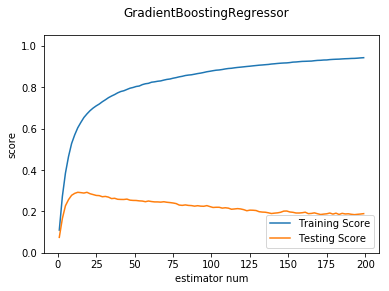

In [54]:
test_GradientBoostingRegressor_num(X_train,X_test,y_train,y_test) 

# 调用 test_GradientBoostingRegressor_maxdepth

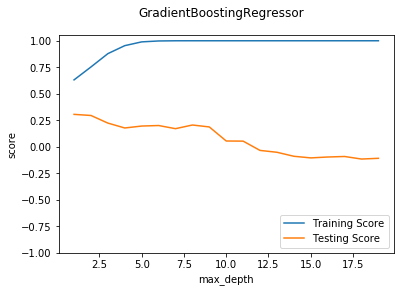

In [55]:
test_GradientBoostingRegressor_maxdepth(X_train,X_test,y_train,y_test) 

# 调用 test_GradientBoostingRegressor_learning

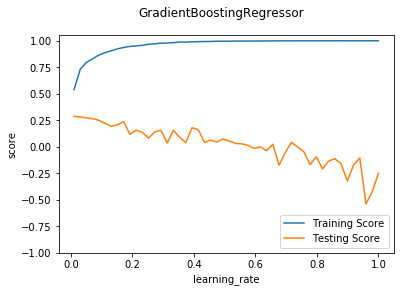

In [56]:
test_GradientBoostingRegressor_learning(X_train,X_test,y_train,y_test) 

# 调用 test_GradientBoostingRegressor_subsample

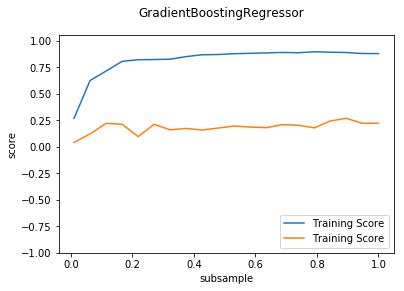

In [57]:
test_GradientBoostingRegressor_subsample(X_train,X_test,y_train,y_test) 

# 调用 test_GradientBoostingRegressor_loss

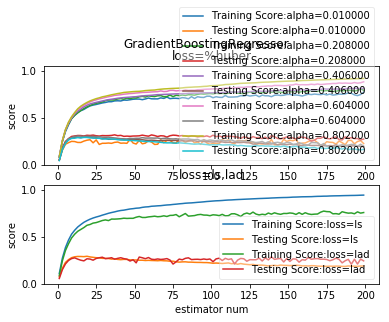

In [58]:
test_GradientBoostingRegressor_loss(X_train,X_test,y_train,y_test) 

# 调用 test_GradientBoostingRegressor_loss

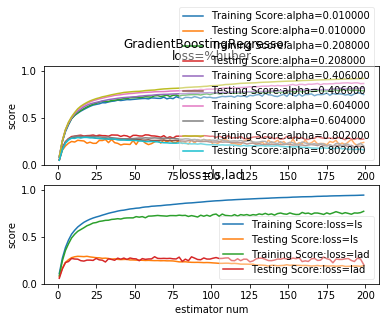

In [59]:
test_GradientBoostingRegressor_loss(X_train,X_test,y_train,y_test) 

# 调用 test_GradientBoostingRegressor_max_features

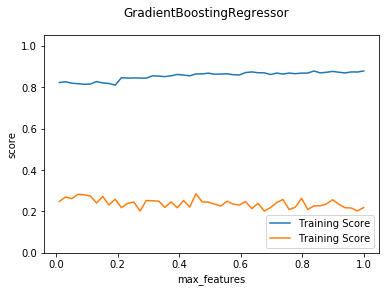

In [60]:
test_GradientBoostingRegressor_max_features(X_train,X_test,y_train,y_test) 

# ⑤集成学习RandomForestClassifier

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,cross_validation,ensemble

# 加载用于分类问题的数据集

In [62]:
def load_data_classification():
    '''
    加载用于分类问题的数据集

    :return: 一个元组，用于分类问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的标记、测试样本集对应的标记
    '''
    digits=datasets.load_digits() # 使用 scikit-learn 自带的 digits 数据集
    return cross_validation.train_test_split(digits.data,digits.target,
    test_size=0.25,random_state=0,stratify=digits.target) # 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

# 测试 RandomForestClassifier 的用法

In [63]:
def test_RandomForestClassifier(*data):
    '''
    测试 RandomForestClassifier 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    clf=ensemble.RandomForestClassifier()
    clf.fit(X_train,y_train)
    print("Traing Score:%f"%clf.score(X_train,y_train))
    print("Testing Score:%f"%clf.score(X_test,y_test))

# 测试 RandomForestClassifier 的预测性能随 n_estimators 参数的影响

In [64]:
def test_RandomForestClassifier_num(*data):
    '''
    测试 RandomForestClassifier 的预测性能随 n_estimators 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,100,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        clf=ensemble.RandomForestClassifier(n_estimators=num)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestClassifier")
    plt.show()

# 测试 RandomForestClassifier 的预测性能随 max_depth 参数的影响

In [65]:
def test_RandomForestClassifier_max_depth(*data):
    '''
    测试 RandomForestClassifier 的预测性能随 max_depth 参数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    maxdepths=range(1,20)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for max_depth in maxdepths:
        clf=ensemble.RandomForestClassifier(max_depth=max_depth)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(maxdepths,training_scores,label="Training Score")
    ax.plot(maxdepths,testing_scores,label="Testing Score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestClassifier")
    plt.show()


# 测试 RandomForestClassifier 的预测性能随 max_features 参数的影响

In [66]:
def test_RandomForestClassifier_max_features(*data):
    '''
    测试 RandomForestClassifier 的预测性能随 max_features 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    max_features=np.linspace(0.01,1.0)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for max_feature in max_features:
        clf=ensemble.RandomForestClassifier(max_features=max_feature)
        clf.fit(X_train,y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))
    ax.plot(max_features,training_scores,label="Training Score")
    ax.plot(max_features,testing_scores,label="Testing Score")
    ax.set_xlabel("max_feature")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestClassifier")
    plt.show()

# 获取分类数据 

In [67]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data_classification()     

# 调用 test_RandomForestClassifier

In [68]:
test_RandomForestClassifier(X_train,X_test,y_train,y_test)  

Traing Score:1.000000
Testing Score:0.944444


# 调用 test_RandomForestClassifier_num

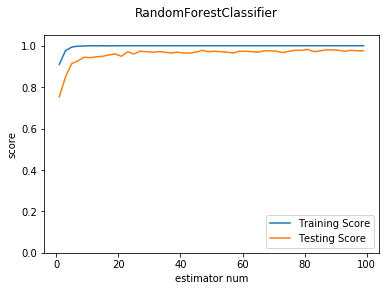

In [69]:
test_RandomForestClassifier_num(X_train,X_test,y_train,y_test)  

# 调用 test_RandomForestClassifier_max_depth

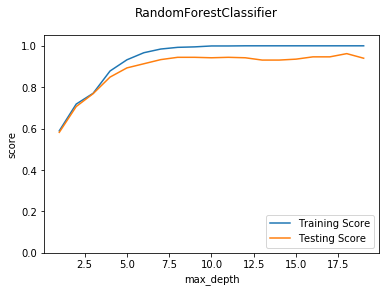

In [70]:
test_RandomForestClassifier_max_depth(X_train,X_test,y_train,y_test)  

# 调用 test_RandomForestClassifier_max_features

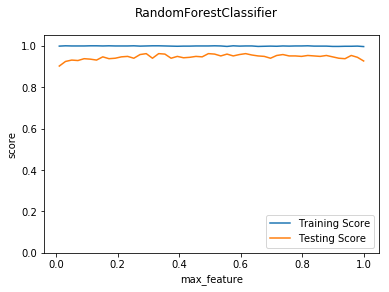

In [71]:
test_RandomForestClassifier_max_features(X_train,X_test,y_train,y_test)  

# ⑥集成学习RandomForestRegressor

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,cross_validation,ensemble

# 加载用于回归问题的数据集

In [73]:
def load_data_regression():
    '''
    加载用于回归问题的数据集

    :return: 一个元组，用于回归问题。元组元素依次为：训练样本集、测试样本集、训练样本集对应的值、测试样本集对应的值
    '''
    diabetes = datasets.load_diabetes() #使用 scikit-learn 自带的一个糖尿病病人的数据集
    return cross_validation.train_test_split(diabetes.data,diabetes.target,
    test_size=0.25,random_state=0) # 拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4

# 测试 RandomForestRegressor 的用法

In [74]:
def test_RandomForestRegressor(*data):
    '''
    测试 RandomForestRegressor 的用法

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    regr=ensemble.RandomForestRegressor()
    regr.fit(X_train,y_train)
    print("Traing Score:%f"%regr.score(X_train,y_train))
    print("Testing Score:%f"%regr.score(X_test,y_test))

# 测试 RandomForestRegressor 的预测性能随  n_estimators 参数的影响

In [75]:
def test_RandomForestRegressor_num(*data):
    '''
    测试 RandomForestRegressor 的预测性能随  n_estimators 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,100,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        regr=ensemble.RandomForestRegressor(n_estimators=num)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1)
    plt.suptitle("RandomForestRegressor")
    plt.show()

# 测试 RandomForestRegressor 的预测性能随  max_depth 参数的影响

In [76]:
def test_RandomForestRegressor_max_depth(*data):
    '''
    测试 RandomForestRegressor 的预测性能随  max_depth 参数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    maxdepths=range(1,20)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for max_depth in maxdepths:
        regr=ensemble.RandomForestRegressor(max_depth=max_depth)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(maxdepths,training_scores,label="Training Score")
    ax.plot(maxdepths,testing_scores,label="Testing Score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestRegressor")
    plt.show()

# 测试 RandomForestRegressor 的预测性能随  max_features 参数的影响

In [77]:
def test_RandomForestRegressor_max_features(*data):
    '''
   测试 RandomForestRegressor 的预测性能随  max_features 参数的影响

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    max_features=np.linspace(0.01,1.0)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for max_feature in max_features:
        regr=ensemble.RandomForestRegressor(max_features=max_feature)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(max_features,training_scores,label="Training Score")
    ax.plot(max_features,testing_scores,label="Testing Score")
    ax.set_xlabel("max_feature")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestRegressor")
    plt.show()

# 获取回归数据

In [78]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data_regression() 

# 调用 test_RandomForestRegressor

In [79]:
test_RandomForestRegressor(X_train,X_test,y_train,y_test) 

Traing Score:0.900604
Testing Score:0.244759


# 调用 test_RandomForestRegressor_num

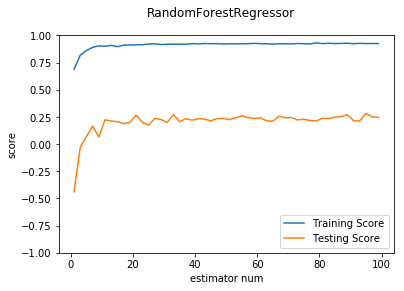

In [80]:
test_RandomForestRegressor_num(X_train,X_test,y_train,y_test) 

# 调用 test_RandomForestRegressor_max_depth

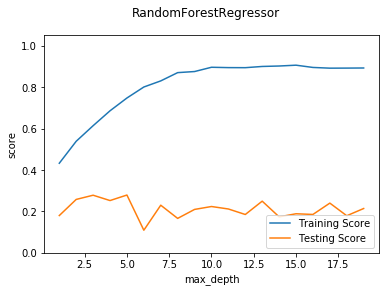

In [81]:
test_RandomForestRegressor_max_depth(X_train,X_test,y_train,y_test) 

# 调用 test_RandomForestRegressor_max_features

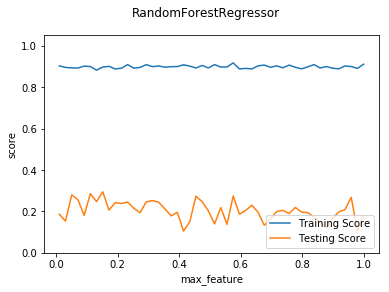

In [82]:
test_RandomForestRegressor_max_features(X_train,X_test,y_train,y_test) 